# Future Sales Prediction


## Data Preprocessing


### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

### Load the data

In [2]:
Sales_Data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/advertising.csv")

### EDA

#### Describe the data

In [3]:
Sales_Data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
Sales_Data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
Sales_Data.shape

(200, 4)

In [6]:
Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
Sales_Data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
Sales_Data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

#### Visualize the data

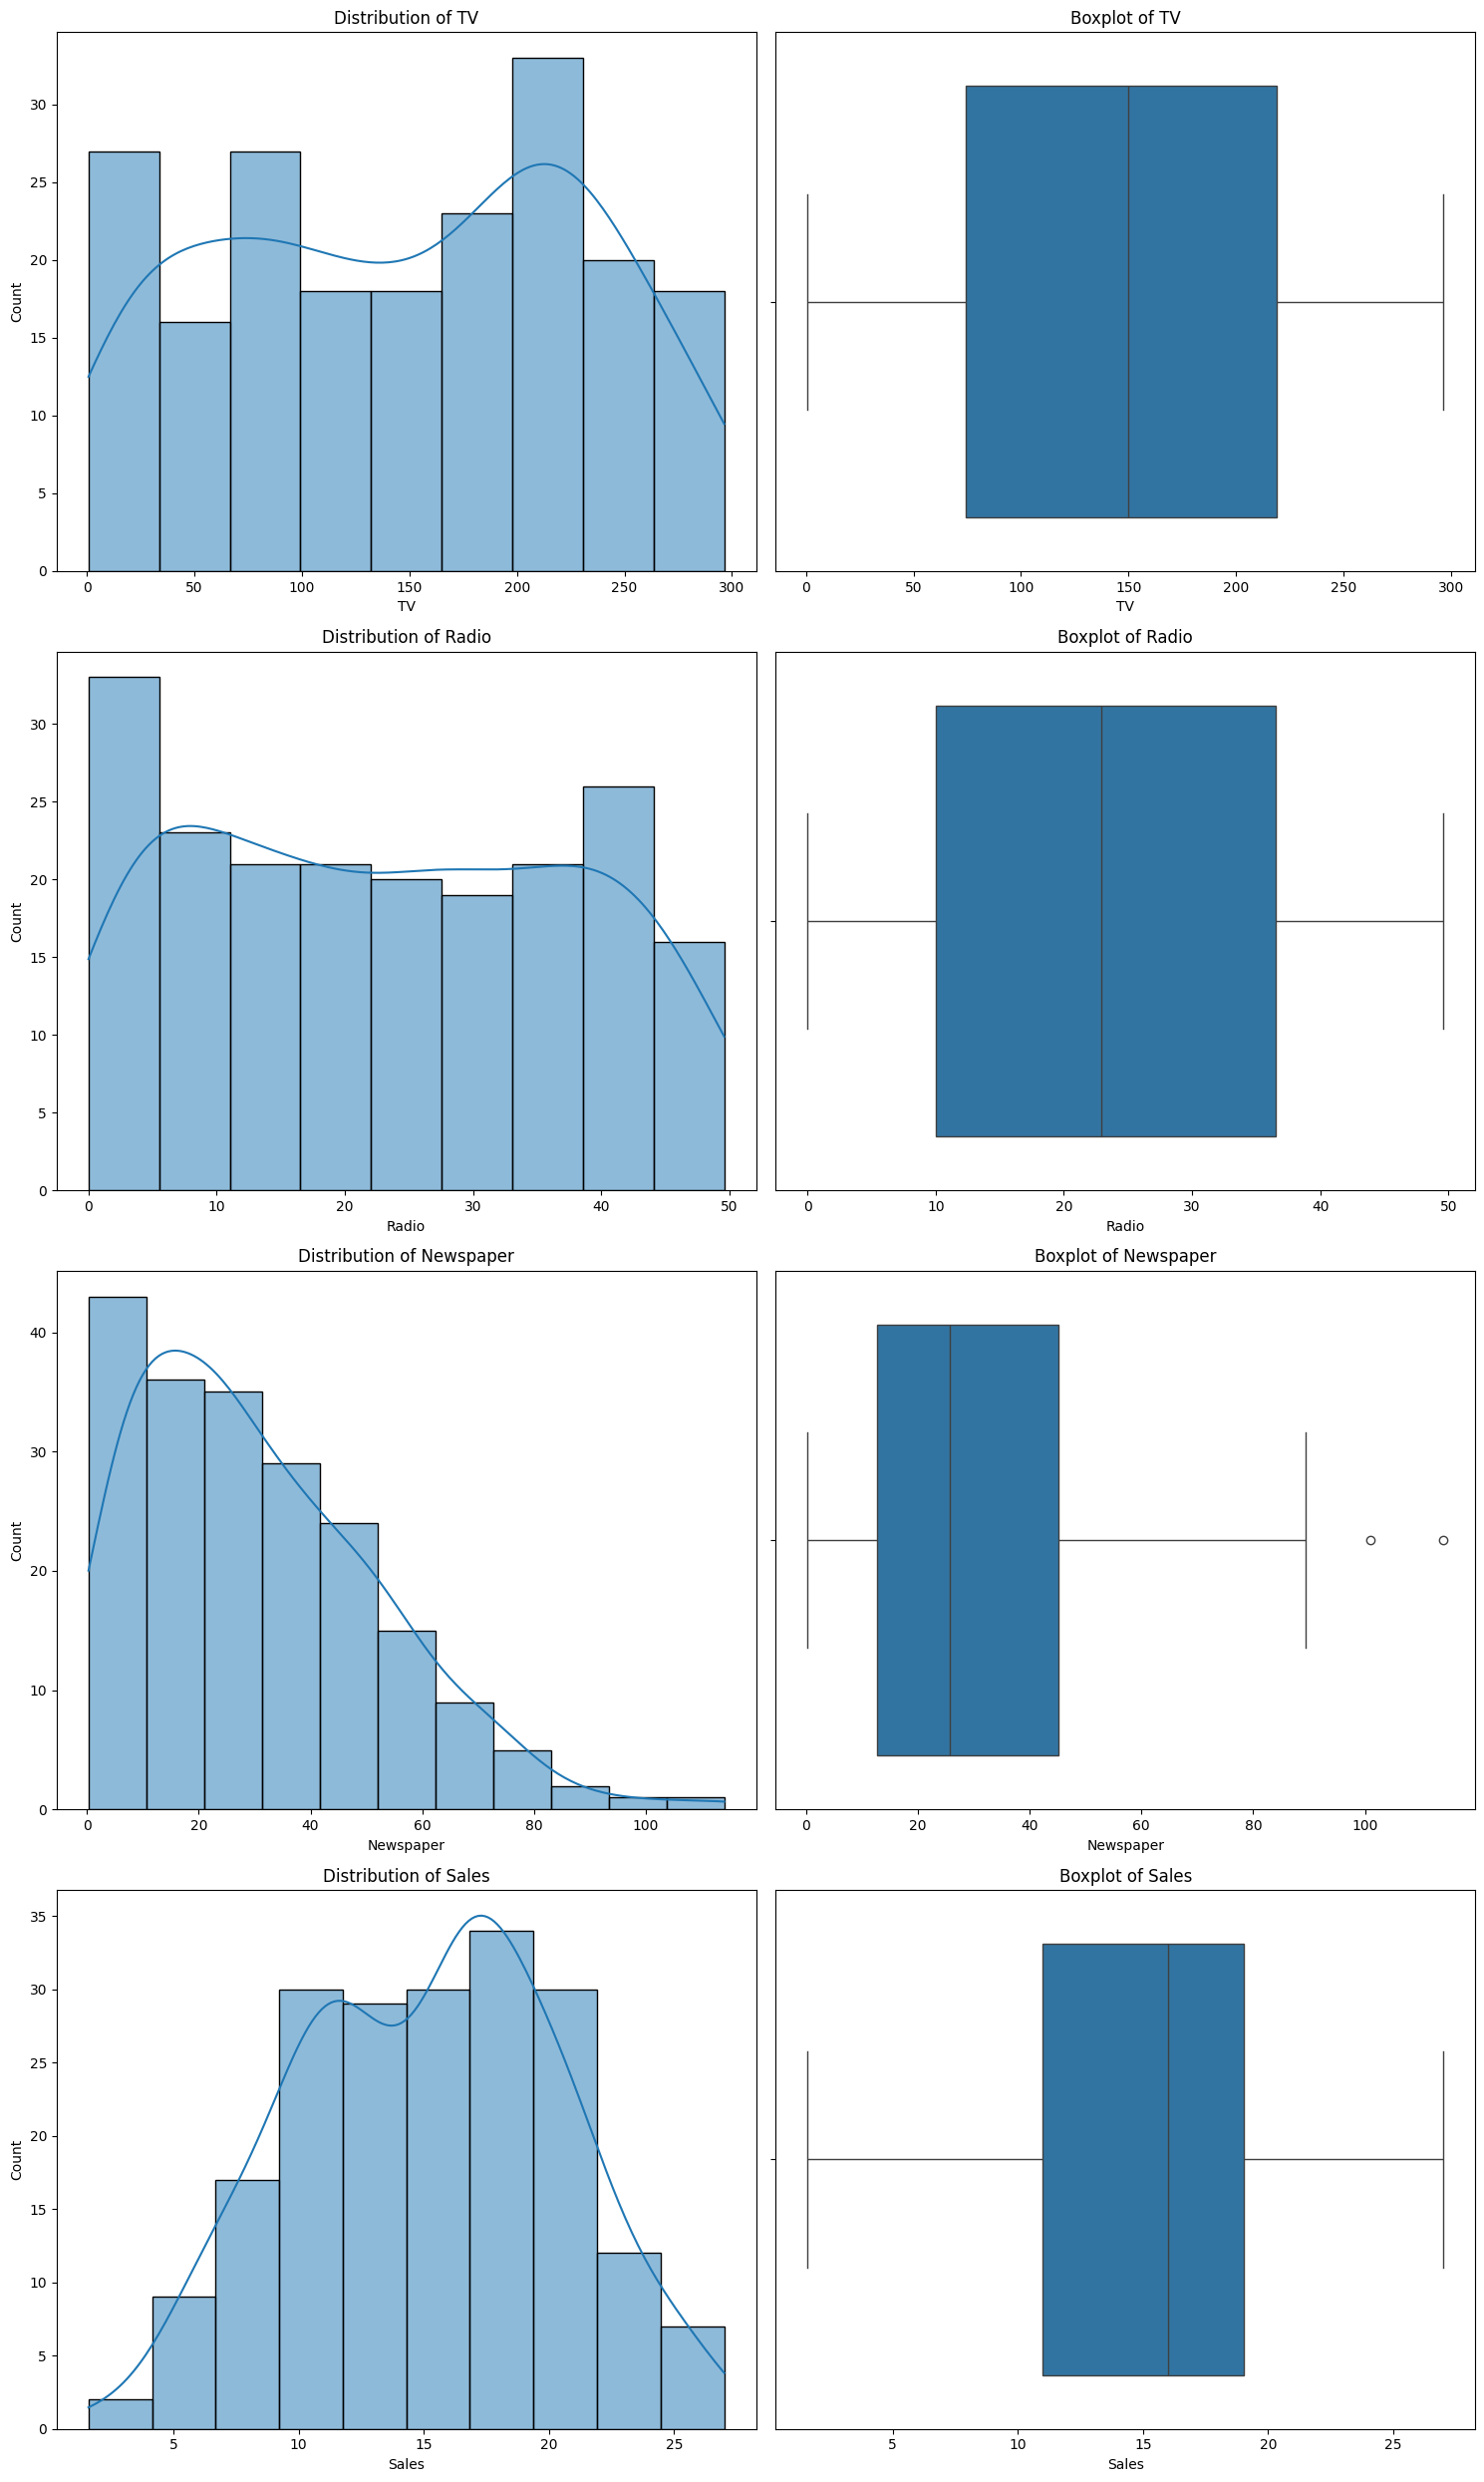

In [11]:
fig, axes = plt.subplots(4, 2, figsize=(15, 25))

# first feature
sns.histplot(Sales_Data['TV'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of TV')
sns.boxplot(x=Sales_Data['TV'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of TV')

# Second feature
sns.histplot(Sales_Data['Radio'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Radio')
sns.boxplot(x=Sales_Data['Radio'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Radio')

# Third feature
sns.histplot(Sales_Data['Newspaper'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Newspaper')
sns.boxplot(x=Sales_Data['Newspaper'], ax=axes[2, 1])
axes[2, 1].set_title('Boxplot of Newspaper')

# Target
sns.histplot(Sales_Data['Sales'], kde=True, ax=axes[3, 0])
axes[3, 0].set_title('Distribution of Sales')
sns.boxplot(x=Sales_Data['Sales'], ax=axes[3, 1])
axes[3, 1].set_title('Boxplot of Sales')

plt.tight_layout() #is a function used to automatically adjust the spacing of subplots in a figure to prevent overlapping content.
plt.show()

Text(0.5, 1.0, 'Newspaper vs Sales')

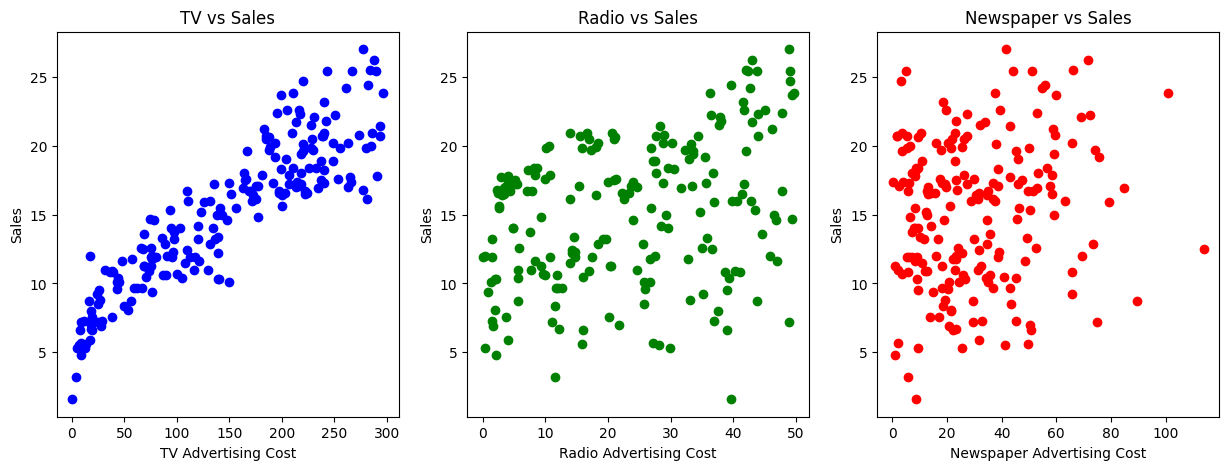

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(Sales_Data['TV'], Sales_Data['Sales'], color='blue')
axes[0].set_xlabel('TV Advertising Cost')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV vs Sales')

# Scatter plot for Radio vs Sales
axes[1].scatter(Sales_Data['Radio'], Sales_Data['Sales'], color='green')
axes[1].set_xlabel('Radio Advertising Cost')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio vs Sales')

# Scatter plot for Newspaper vs Sales
axes[2].scatter(Sales_Data['Newspaper'], Sales_Data['Sales'], color='red')
axes[2].set_xlabel('Newspaper Advertising Cost')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper vs Sales')

### Cleaning the data

#### Removing Outliers

In [12]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1_Newspaper = Sales_Data['Newspaper'].quantile(0.25)
Q3_Newspaper = Sales_Data['Newspaper'].quantile(0.75)
IQR_Newspaper = Q3_Newspaper - Q1_Newspaper


lower_bound_Newspaper = Q1_Newspaper - 1.5 * IQR_Newspaper
upper_bound_Newspaper = Q3_Newspaper + 1.5 * IQR_Newspaper

# Remove outliers
Sales_Data_no_outliers = Sales_Data[(Sales_Data['Newspaper'] >= lower_bound_Newspaper) & (Sales_Data['Newspaper'] <= upper_bound_Newspaper)]
                  

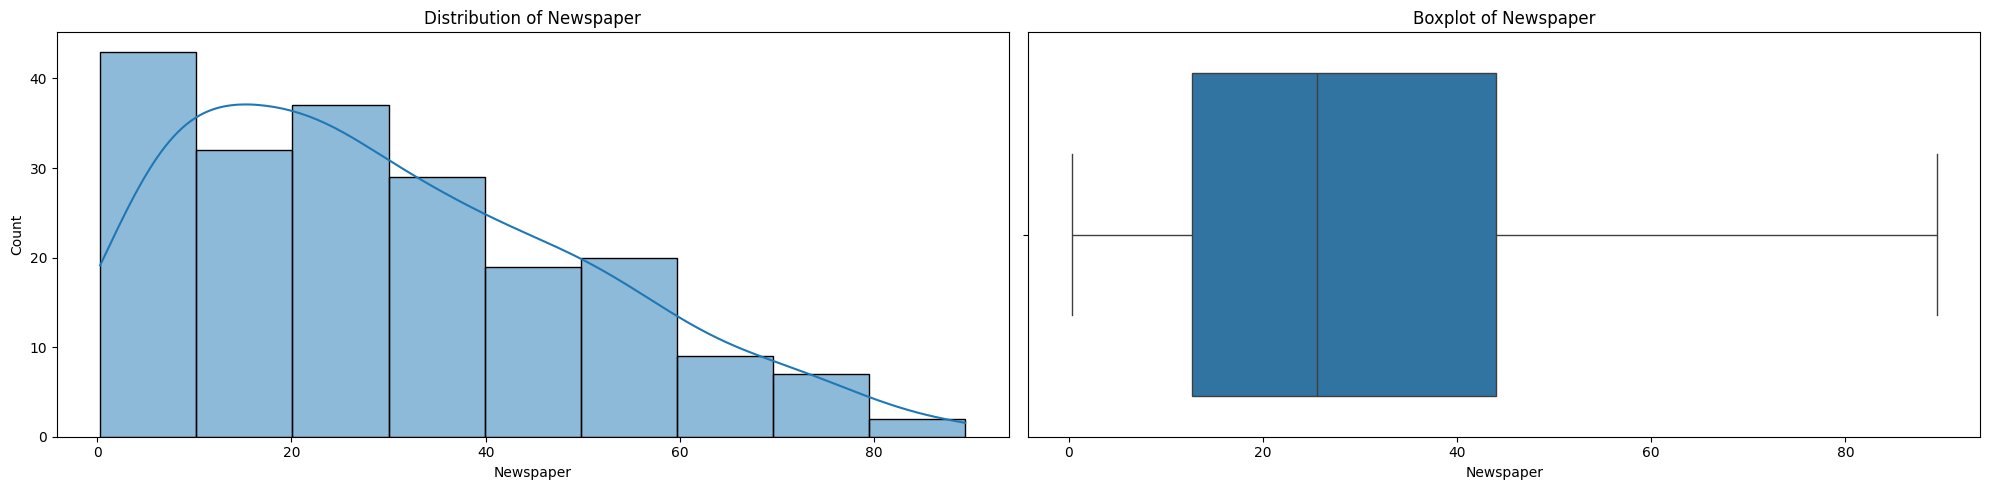

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))


# Fourth feature
sns.histplot(Sales_Data_no_outliers['Newspaper'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Newspaper')
sns.boxplot(x=Sales_Data_no_outliers['Newspaper'], ax=axes[1])
axes[1].set_title('Boxplot of Newspaper')


plt.tight_layout() #is a function used to automatically adjust the spacing of subplots in a figure to prevent overlapping content.
plt.show()

<Axes: >

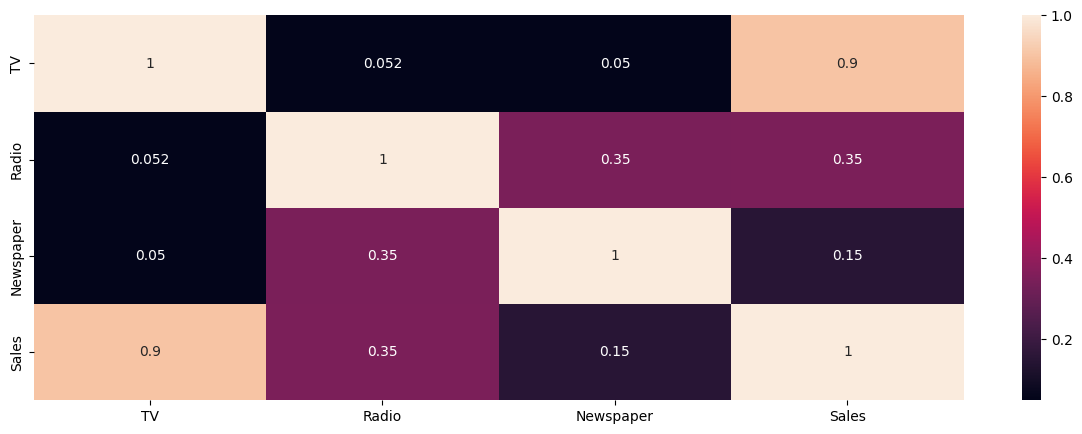

In [24]:
corr_matrix = Sales_Data_no_outliers.corr()
plt.figure(figsize = (15,5))
sns.heatmap(data = corr_matrix, annot = True)

#### Scaling

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Sales_Data_no_outliers.drop(columns = ['Sales']))

### Train Test Split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Sales_Data_no_outliers['Sales'], test_size=0.2, random_state=42)

## Training 

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [34]:
print("Training Mean Squared Error:", mean_squared_error(y_train, y_train_pred))
print("Testing Mean Squared Error:", mean_squared_error(y_test, y_test_pred))

Training Mean Squared Error: 2.8332174960409433
Testing Mean Squared Error: 2.4157289455935063


In [37]:
model.coef_

array([4.59879461, 1.49750201, 0.15233484])

In [38]:
model.intercept_

np.float64(15.097868989808463)

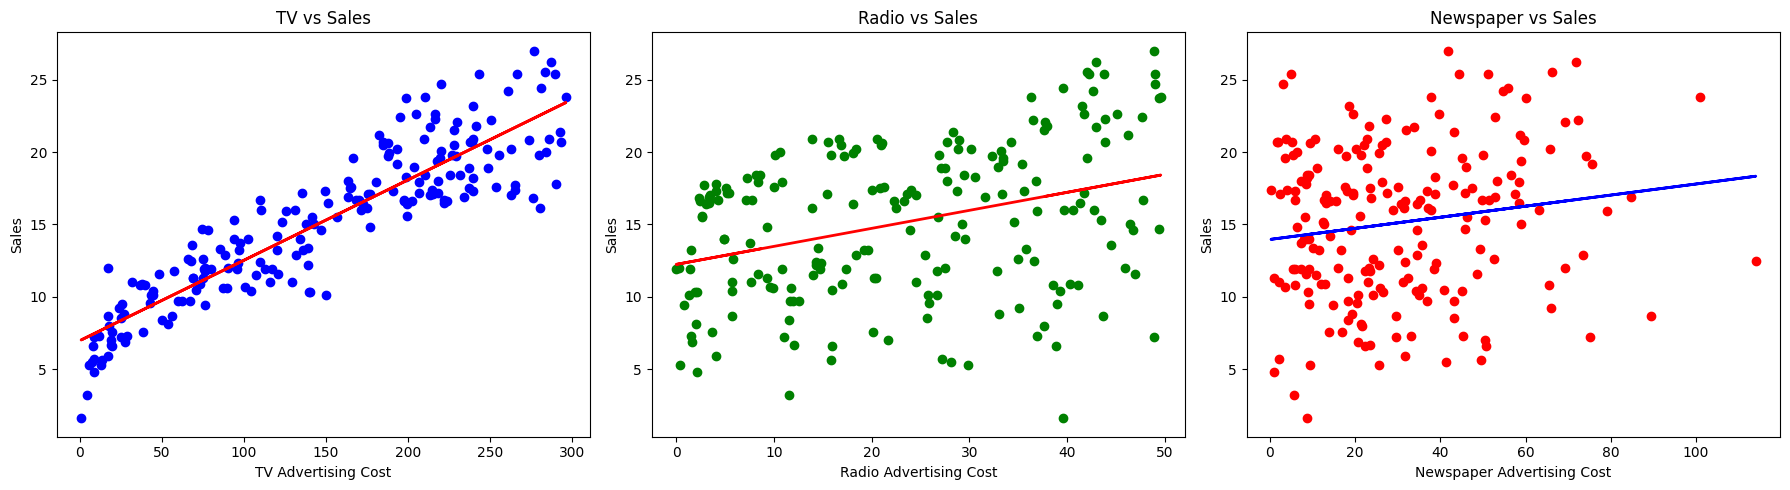

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot and regression for TV vs Sales
axes[0].scatter(Sales_Data['TV'], Sales_Data['Sales'], color='blue')
model_tv = LinearRegression()
X_tv = Sales_Data[['TV']]
y_tv = Sales_Data['Sales']
model_tv.fit(X_tv, y_tv)
y_tv_pred = model_tv.predict(X_tv)
axes[0].plot(Sales_Data['TV'], y_tv_pred, color='red', linewidth=2)
axes[0].set_xlabel('TV Advertising Cost')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV vs Sales')

# Scatter plot and regression for Radio vs Sales
axes[1].scatter(Sales_Data['Radio'], Sales_Data['Sales'], color='green')
model_radio = LinearRegression()
X_radio = Sales_Data[['Radio']]
y_radio = Sales_Data['Sales']
model_radio.fit(X_radio, y_radio)
y_radio_pred = model_radio.predict(X_radio)
axes[1].plot(Sales_Data['Radio'], y_radio_pred, color='red', linewidth=2)
axes[1].set_xlabel('Radio Advertising Cost')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio vs Sales')

# Scatter plot and regression for Newspaper vs Sales
axes[2].scatter(Sales_Data['Newspaper'], Sales_Data['Sales'], color='red')
model_newspaper = LinearRegression()
X_newspaper = Sales_Data[['Newspaper']]
y_newspaper = Sales_Data['Sales']
model_newspaper.fit(X_newspaper, y_newspaper)
y_newspaper_pred = model_newspaper.predict(X_newspaper)
axes[2].plot(Sales_Data['Newspaper'], y_newspaper_pred, color='blue', linewidth=2)
axes[2].set_xlabel('Newspaper Advertising Cost')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper vs Sales')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [35]:
model.score(X_train, y_train)

0.8973073018699192

In [36]:
model.score(X_test, y_test)

0.9130003152798274